In [27]:
from numpy import array, dstack, roll
from math import ceil, sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.transform import rescale
from time import time
from skimage.io import imread

3238


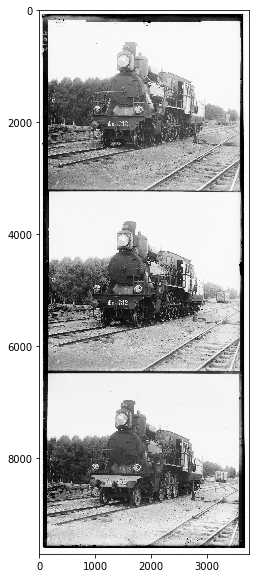

In [21]:
img = imread('/Users/irubachev/Documents/CS/cvision/01-color-reconstruct/data/big/00458a.png', plugin='matplotlib')
plt.figure(figsize=(30, 10))
plt.imshow(img, cmap='gray')
print(img.shape[0] // 3)

In [22]:
def crop(img, percentage=6):
    height, width = img.shape
    beg_h, end_h = ceil((height * percentage) / 100), ceil(height - (height * percentage) / 100)
    beg_w, end_w = ceil((width * percentage) / 100), ceil(width - (width * percentage) / 100)
    return img[beg_h:end_h, beg_w:end_w]

In [23]:
def cross_corellation(first_inp, second_inp):
    numerator = 0
    denominator_first = 0
    denominator_second = 0
    for x in range(first_inp.shape[0]):
        for y in range(first_inp.shape[1]):
            numerator += first_inp[x][y] * second_inp[x][y]
            denominator_first += first_inp[x][y]**2
            denominator_second += second_inp[x][y]**2
    denominator = sqrt(denominator_first * denominator_second)
    return numerator / denominator
    

In [24]:
def find_offset_one_dim(first_color, second_color, error_func, xrange, yrange):
    first_color = crop(first_color, 20)
    second_color = crop(second_color, 20)
    min_error = error_func(first_color, second_color)
    x_min = 0
    y_min = 0
    for x in xrange:
        for y in yrange:
            temp_first = np.roll(first_color, x, axis=0)
            temp_first = np.roll(temp_first, y, axis=1)
            temp_second = second_color
            new_error = error_func(temp_first, temp_second)
            if (new_error < min_error):
                min_error = new_error
                x_min = x
                y_min = y
    return (x_min, y_min)

In [25]:
b, g, r = np.split(img[:img.shape[0] // 3 * 3], 3)

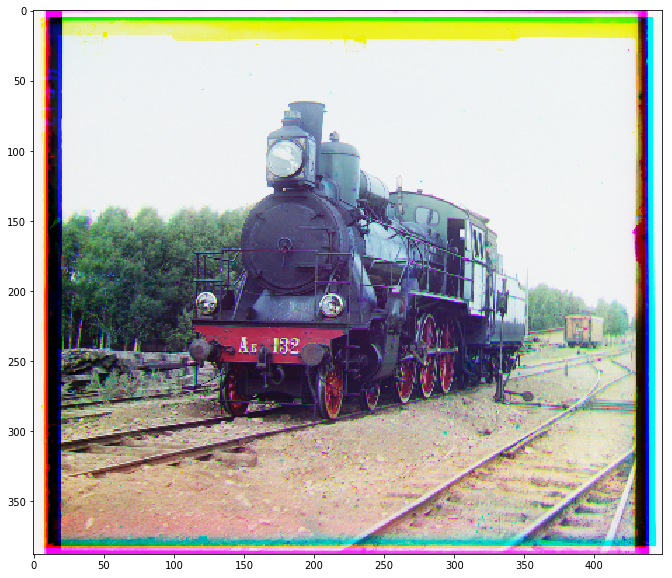

In [13]:
b, g, r = np.split(img[:img.shape[0] // 3 * 3], 3)

dx_blue, dy_blue = find_offset_one_dim(g, b, mean_squared_error, np.arange(-15, 16), np.arange(-15, 16))
dx_red, dy_red = find_offset_one_dim(g, r, mean_squared_error, np.arange(-15, 16), np.arange(-15, 16))

b = np.roll(b, -dx_blue, axis=0)
b = np.roll(b, -dy_blue, axis=1)

r = np.roll(r, -dx_red, axis=0)
r = np.roll(r, -dy_red, axis=1)

rgb_image = np.dstack([r, g, b])
plt.figure(figsize=(30,10))
plt.imshow(rgb_image)

# Pyramids new algo

In [32]:
def find_offset(first_img, second_img):
    if (first_img.shape[0] < 600):
        a, b = find_offset_one_dim(first_img, second_img, 
                                   mean_squared_error, 
                                   np.arange(-15, 16), 
                                   np.arange(-15, 16))
        return a, b


    temp_first = rescale(first_img, .5, mode='constant')
    temp_second = rescale(second_img, .5, mode='constant')
    
    dx, dy = find_offset(temp_first, temp_second)
    dx *= 2
    dy *= 2
    return find_offset_one_dim(first_img, second_img, 
                               mean_squared_error, 
                               np.arange(dx - 2, dx + 3), 
                               np.arange(dy - 2, dy + 3))

In [33]:
%%time
b, g, r = np.split(img[:img.shape[0] // 3 * 3], 3)
dx_blue, dy_blue = find_offset(g, b)
dx_red, dy_red = find_offset(g, r)

CPU times: user 3.85 s, sys: 1 s, total: 4.86 s
Wall time: 4.94 s


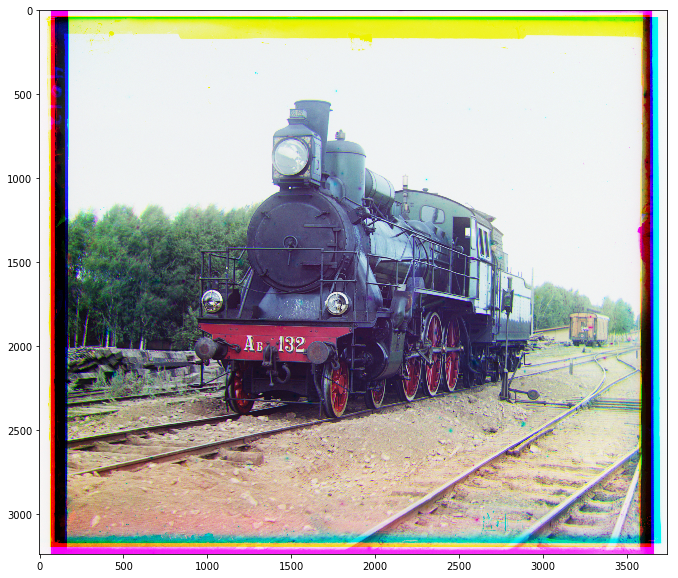

In [34]:
b, g, r = np.split(img[:img.shape[0] // 3 * 3], 3)
avg_height = b.shape[0]

b = np.roll(b, -dx_blue, axis=0)
b = np.roll(b, -dy_blue, axis=1)

r = np.roll(r, -dx_red, axis=0)
r = np.roll(r, -dy_red, axis=1)

rgb_image = np.dstack([r, g, b])
plt.figure(figsize=(30,10))
plt.imshow(rgb_image)

In [266]:
print(386 + dx_blue - img.shape[0] // 3)
print(386 + dx_red + img.shape[0] // 3)
print(img.shape[0] // 3)

48
719
341


147, 875

42, 735

358 -- 100%

 6 --   1.7%